# <h1>Homework 2

# <h1> Problem 1
We have been given the following function <br/>
$ f = 2x_{1}^2 - 4x_{1}x_{2} + 1.5x_{2}^2 + x_{2}
$
<br/>
First, let's find the stationary point <br/>
$i.e \; (x_{1},x_{2})$ where $\frac{\partial f}{\partial x_1} = 0$ and $\frac{\partial f}{\partial x_2} = 0$
simultaneously
<br/>
Thus, $\frac{\partial f}{\partial x_1} = 4x_{1} - 4x_{2} \rightarrow (1)$
<br/> and <br/>
$\frac{\partial f}{\partial x_2} = -4x_{1} + 3x_{2} + 1 \rightarrow (2)$
<br/> Solving $(1)$ and $(2)$ simultaneously we get,
$(x_{1},x_{2}) = [1,1]$
<br/> Thus, stationary point of the function is $[1,1]$
<br/> To find whether a point is saddle point for the function or not, we need to compute its hessian
at the point.<br/>
Therefore, $H = \begin{bmatrix}
   \frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial^2 f}{\partial x_{1}x_{2}}\\
   \frac{\partial^2 f}{\partial x_{2}x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2}
  \end{bmatrix}$
 <br/>
 $H = \begin{bmatrix}
 4 & -4\\
 -4 & 3
 \end{bmatrix}$

In [1]:
import numpy as np
from numpy import linalg as la
eig,v = la.eig(np.array([[4 ,-4],[-4,3]]))
print(eig)

[ 7.53112887 -0.53112887]


<br/> The resulting Hessian is an indefinite matrix, since the matrix eigen values are both positive and negative.
Hence, for this function all stationary points are saddle points.

<h1> Problem 2<br/>
<h2> Part a

In this problem, we are asked to find the point on plane
$x_{1} + 2x_{2} + 3x_{3} = 1$ closest to the point $(- 1,0,1)^{T}$
<br/> Firstly, to convert this into an unconstrained problem we substitute <br/>
$x_{1} = 1 - 2x_{2} - 3x_{3}$ <br/>
Let the point be $(x_{1}^{*},x_{2}^{*},x_{3}^{*})$<br/>
Thus, distance of given point from closest point can be represented as <br/>
$D = \sqrt{(-1 -1 + 2x_{2} + 3x_{3})^{2} + (0-x_{2})^{2} + (1-x_{3})^{2} }$
<br/>Thus, our job is to
<br/> $minimize \; D$

In [2]:
import numpy as np
import math
from scipy.optimize import minimize

In [3]:
def cost_func(x):
    return math.sqrt((-2+2*x[0]+3*x[1])**2+(x[0])**2+(1-x[1])**2)

In [4]:
x0 = np.array([-1,-1])
sol = minimize(cost_func,x0)

In [5]:
print("[x2,x3] = ",sol.x)
print("x1 = ",1-2*sol.x[0]-3*sol.x[1])

[x2,x3] =  [-0.14285709  0.78571426]
x1 =  -1.071428598689087


Thus the point on plane $x_{1} + 2x_{2} + 3x_{3} = 1$ closest to the point $(- 1,0,1)^{T}$ is
$\begin{bmatrix}
x_{1}\\
x_{2}\\
x_{3}
\end{bmatrix}$ = $
\begin{bmatrix}
-1.0714\\
-0.1428\\
0.7857
\end{bmatrix}$

<h2> Part b
<h3> Gradient Descent Algorithm

In this problem, we first solve the optimization problem using gradient descent algorithm. The gradient descent
algorithm implies that, <br/>
for a function $f(x)$ that is differentiable, point $a^*$ that minimizes $f(x)$ is reached fastest if we go
from $a_0$ in the direction of $a-\nabla f(x)$ i.e. the negative gradient.<br/>
We have already defined the function $D$ in the above problem. Minimizing $D$ is same as minimizing $D^2$.
<br/>Thus, $\nabla D^2 = \begin{bmatrix}
-8+10x_{2}+12x_{3}\\
-14+12x_{2}+20x_{3}
\end{bmatrix}$

In [6]:
def cost_func(x):
    return -8+10*x[0]+12*x[1],-14+12*x[0]+20*x[1]

Lets run the gradient descent for 200 iterations and plot the convergance. Let's assume $\gamma = 0.05$ i.e.
the learning rate.

In [7]:
a = np.array([0,0])
gamma = np.array(0.05)
optim = np.array([-0.14285709,0.78571426])
error = []
for x in range(500):
    a = a - gamma*cost_func(a)
    error.append((a-optim)**2)

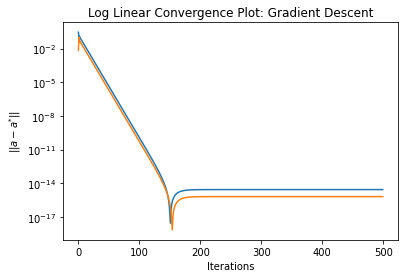

In [8]:
import matplotlib.pyplot as plt
plt.figure(1);plt.clf()
plt.plot(error)
plt.gca().set_yscale('log')
plt.xlabel('Iterations')
plt.ylabel('$||a-a^{*}||$')
plt.title('Log Linear Convergence Plot: Gradient Descent')
plt.show()

In [9]:
print("[x2,x3] = ",a)
print("x1 = ",1-2*a[0]-3*a[1])


[x2,x3] =  [-0.14285714  0.78571429]
x1 =  -1.0714285714285714


<h3> Newton's Algorithm

Newton's algorithm states that the optimum solution $a^*$ that minimizes $f(x)$ is reached fastest if we go from
$a_0$ in the direction of $a-\frac{f'(x)}{f''(x)}$.

In [10]:
from numpy.linalg import inv
def cost_func(x):
    return -8+10*x[0]+12*x[1],-14+12*x[0]+20*x[1]
def hessian():
    return inv(np.array([[10,12],[12,20]]))

In [11]:
error = []
a = np.array([1,-1])
for i in range(200):
    a = a-np.matmul(hessian(),cost_func(a))
    error.append((optim-a)**2)

In [12]:
print("[x2,x3] = ",a)
print("x1 = ",1-2*a[0]-3*a[1])

[x2,x3] =  [-0.14285714  0.78571429]
x1 =  -1.0714285714285712


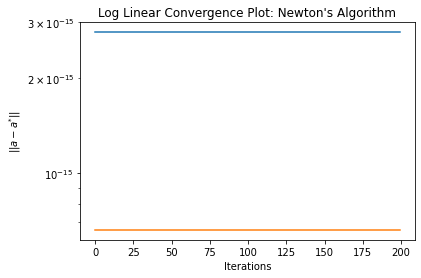

In [14]:
import matplotlib.pyplot as plt
plt.figure(1);plt.clf()
plt.plot(error)
plt.gca().set_yscale('log')
plt.xlabel('Iterations')
plt.ylabel('$||a-a^{*}||$')
plt.title('Log Linear Convergence Plot: Newton\'s Algorithm')
plt.show()


In [17]:
eig,v = la.eig(np.array([[10,12],[12,20]]))
eig

array([ 2., 28.])

<h2> Problem 3
<h3> Part a

Prove $af(x) + bg(x)$ is convex for $a>0$ and $b>0$ where $f(x)$ and $g(x)$ is convex.
<br/> Firstly, since $f(x)$ is convex we know,
<br/> $f(\lambda x_{1} + (1-\lambda)x_2)\leq \lambda f(x_1) + (1-\lambda)f(x_2)$,
<br/> where $x_1,x_2 \in \mathscr{X}$ and $\lambda \in [0,1]$<br/>
Thus, multiplying $a$ to the equation, we get <br/>
$af(\lambda x_{1} + (1-\lambda)x_2)\leq a\lambda f(x_1) + a(1-\lambda)f(x_2) \rightarrow (1)$
<br/> Similarly, since $g(x)$ is convex we get,
$bg(\lambda x_{1} + (1-\lambda)x_2)\leq b\lambda g(x_1) + b(1-\lambda)g(x_2) \rightarrow (2)$
<br/> Adding $(1)$ and $(2)$ we get,
<br/>$af(\lambda x_{1} + (1-\lambda)x_2) + bg(\lambda x_{1} + (1-\lambda)x_2)
\leq a\lambda f(x_1) + a(1-\lambda)f(x_2) + b\lambda g(x_1) + b(1-\lambda)g(x_2)$
<br/>$\leq \lambda(af(x_1)+bg(x_1)) + (1-\lambda)(af(x_2)+bg(x_2))$
<br/> Hence, by definition, $af(x)+bg(x)$ is convex for $a>0$, $b>0$

<h2> Part b

Find when $f(g(x))$ will be convex
<br/> For any function $f(x)$ to be convex $f''(x) > 0$ for all $x \in S$
<br/> Thus, for the given problem $f''(x)>0$ and $g''(x)>0$ since $f(x)$ and $g(x)$ is convex.
<br/> Let's find the second order derivative of $f(g(x))$,
<br/> By chain rule of differentiation we get,
<br/> $\nabla f(g(x)) = f'(g(x)) \times g'(x)$
<br/> $\nabla^{2} f(g(x)) = g'(x)\times f''(g(x))\times g'(x) + f'(g(x))\times g''(x)$
<br/> $\nabla^{2} f(g(x)) = (g'(x))^{2}f''(g(x)) + f'(g(x))g''(x)$
<br/> Thus, for convexity $(g'(x))^{2}f''(g(x)) + f'(g(x))g''(x)>0$ strictly.
<br/> If we take a closer look at all the terms, we realize, $(g'(x))^{2}>0$, $f''(g(x))>0$ since $f(x)$ is convex
<br/> $g''(x)>0$ since $g(x)$ is convex. Thus, convexity of $f(g(x))$ is totally dependent on whether $f'(g(x))>0$.
<br/> That means $f$ should be a function where $f'>0$. For example, if $f(x) = x^3$, then $f'(x) = 3x^{2} >0$.
<br/> Only under these circumstances $f(g(x))$ will be convex.

<h2> Problem 4

Prove $f(x_1) \geq f(x_0) + g_{x_0}^{T}.(x_1 - x_0)$
<br/> We can also write this as,
<br/> $f(x_1)-f(x_0)\geq g_{x_0}^{T}.(x_1 - x_0) \rightarrow (1)$
<br/> Since, $f(x)$ is convex we know that,
<br/>$f(\lambda x_1 - (1-\lambda)x_0) \leq \lambda f(x_1) + (1-\lambda)f(x_0)$
<br/> Where $x_1,x_0 \in \mathscr{X}$ and $\lambda \in [0,1]$
<br/>$f(x_0 + \lambda (x_1-x_0)) \leq \lambda f(x_1) + (1-\lambda)f(x_0)$
<br/> We can also write this as,
<br/> $\lambda f(x_1) \geq f(x_0 + \lambda (x_1-x_0)) + (\lambda - 1) f(x_0)$
<br/> Dividing by $\lambda$ on both sides we get,
<br/> $f(x_1) \geq \frac{f(x_0 + \lambda (x_1-x_0)) + (\lambda - 1) f(x_0)}{\lambda}$
<br/> $f(x_1) \geq \frac{f(x_0 + \lambda (x_1-x_0)) -  f(x_0)}{\lambda} + f(x_0)$
<br/> $f(x_1) - f(x_0) \geq \frac{f(x_0 + \lambda (x_1-x_0)) -  f(x_0)}{\lambda}$
<br/> Taking $\lim_{\lambda \to 0}$ on both sides we get,
<br/> $\lim_{\lambda \to 0} f(x_1) - f(x_0) \geq \lim_{\lambda \to 0} \frac{f(x_0 + \lambda (x_1-x_0)) -  f(x_0)}{\lambda}$
<br/> $f(x_1) - f(x_0) \geq \lim_{\lambda \to 0} \frac{f(x_0 + \lambda (x_1-x_0)) -  f(x_0)}{\lambda}$
<br/> On the right hand side, we see that this is the definition of directional derivatives https://www.wikiwand.com/en/Directional_derivative
<br/> $f(x_1) - f(x_0) \geq \nabla_{x_1-x_0} f(x_0) \rightarrow (2)$
<br/> But since $f(x)$ is convex, it is differentiable and thus, by the definition of directional derivatives
<br/> $\nabla_{x_1-x_0} f(x_0) = \nabla f(x_0).(x_1-x_0) \rightarrow (3)$
<br/> But $\nabla f(x_0) = g_{x_0}^{T} \rightarrow (4)$ or in other words gradient of $f(x)$ at $x_0$
<br/> Thus, from $(2),\;(3),\;(4)$ we get,
<br/>$f(x_1)-f(x_0)\geq g_{x_0}^{T}.(x_1 - x_0)$
<br/> And thus, if $f(x)$ is convex for $x_1, x_0 \in \mathscr{X}$
<br/> $f(x_1)\geq f(x_0) + g_{x_0}^{T}.(x_1 - x_0)$

<h2> Problem 5
<h3> Part a

Define the problem as an optimization problem.

<br/> We have been given that the actual reflection intensity on the $k^{th}$ mirror is $a^{T}_{k}p$ where $a_k$ is the distance
of all lamps to the mirrors and $p$ is the power output of the lamps.
<br/> Thus, actual intensity $I = a^{T}_{k}p$.
<br/> Our aim is to keep the actual intensity close to the target intensity $I_t$ or in other words
we have to show that $I - I_t \rightarrow 0$ or minimize objective.
<br/> Since we are tuning power levels of each lamp, there could be a possibility where $I<I_t$ in which case the
difference is negative. This could open up a lot of possibilities and would not necessarily generate a solution in optimization.
<br/> We know that $min f(x)$ is same as $min (f(x))^{2}$.
<br/> Thus we could minimize $(I - I_t)^{2}$ which means that we want $(I - I_t)^{2}$ close to $0$.
<br/> Mathematically, we could write this as,
<br/>  $min\;\sum_{k}(a^{T}_{k}p - I_t)^{2}$

<h2> Part b

Prove that this problem is convex

To prove that this problem is convex we need to show the hessian as,
<br/> $H$ is positive semi definite.
<br/> From the above optimization problem let's take an individual component as $(a^{T}_{k}p - I_t)^{2}$.
<br/> The gradient of this w.r.t $p$ is given as: $2(a^{T}_{k}p - I_t).a_{k}$
<br/> Thus, the gradient $g = 2a^{T}_{k}p a_{k} - 2I_{t}a_{k}$
<br/> This could also be written as $g = 2 a_{k}a^{T}_{k}p - 2I_{t}a_{k}$
<br/> The hessian or $g'$ is given as,
<br/> $H = 2a_{k}a_{k}^T$
<br/> This is the hessian of an individual component. The hessian of all components in the problem is given as,
<br/> $H = \sum_{k} 2a_{k}a_{k}^T$
<br/> For convexity, $H$ needs to be semi definite or $x^{T}Hx\geq 0$ for all non-zero values of $x$.
<br/> $x^{T}Hx = \sum_{k} 2 x^{T}a_{k}a_{k}^T x$
<br/> Let $x^{T}a_{k} = c = a_{k}^T x$
<br/> $x^{T}Hx = \sum_{k} 2 c^{2}$
<br/> Thus, $x^{T}Hx >0$ for all values of $x$ and $x^{T}Hx =0$ when $x$ is in the null-space of $a_{k}$.
<br/> Thus, $x^{T}Hx$ is a positive semi-definite matrix and hence the problem is convex.